### Machine Learning: Deriving Logistic Regression
___

#### Summary:

In this Python notebook we show how to derive the Logistic Regression model with and without TensorFlow; this can be useful in understanding how neural networks with many layers work. We then test these models on some data which should give the same results since they calculate the same thing and have the same initialization. In addition to using our own functions, we also apply the LogisticRegression function available in the scikit-learn library. 
___
#### This notebook will include:

1. Logistic Regression Model without Tensorflow
2. Logistic Regression Model with Tensorflow
3. Logistic Regression Model with sklearn

___
#### Reference: 

Much of what is in this notebook was learned from the Deep Learning Specialization Coursera course by Andrew Ng.

In [1]:
# Logistic Regression Model without TensorFlow
"""
Here we derive the forward and backward propagation steps in Logistic Regression using simple NumPy functions. 
"""

def Logistic_Regression_Model(X_train, y_train, X_test, y_test, num_iterations = 10000, learning_rate = 0.01, reg_param = 0, print_cost = False):
    """
    X_train - shape (#training examples, #features) 
    X_test  - shape (#test examples, #features)
    y_train - shape (#training examples, )
    y_test  - shape (#test examples, )

    W - parameter of shape (1, #features)
    """
    # Importing the libraries
    import numpy as np
    
    # Reshaping y to be a column vector for convenience
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

    # Defining the constants
    num_features = X_train.shape[1]    # number of input features
    m_train = X_train.shape[0]         # number of training examples
    m_test = X_test.shape[0]           # number of test examples

    # Initializing the parameters
    W = np.zeros((1, num_features))    # initialize W to be an array of zeros of shape (1, num_features)
    b = 0.0                            # initialize b to zero
    
    # Training
    for i in range (num_iterations):
        # Forward propagation
        Z_train = np.matmul(X_train, np.transpose(W)) + b
        y_hat = 1.0 / (1 + np.exp(-Z_train))  # Sigmoid function
        loss_train = -y_train * np.log(y_hat) - (1-y_train) * np.log(1-y_hat)
        cost_train = (1.0/m_train) * (np.sum(loss_train) + 0.5 * reg_param * np.matmul(W, np.transpose(W)))
        # Backpropagation
        W = W - learning_rate * (1.0/m_train) * (np.matmul(np.transpose(y_hat - y_train), X_train) + reg_param * W)
        b = b - learning_rate * (1.0/m_train) * np.sum(y_hat - y_train)
        
        # Printing the parameters and cost every 100 iterations
        if print_cost and i % 100 == 0:
            print('Parameters and cost after iteration %i: \nW: %s, b: %s, cost: %s\n'%(i, W, b, cost_train))
    
    # Predicting the test set results
    Z_test = np.matmul(X_test, np.transpose(W)) + b
    y_pred = 1.0 / (1 + np.exp(-Z_test))
    print('Prediction on test set: ', (y_pred>0.5).astype(int).ravel())
    
    # Training accuracy
    print('Training Accuracy: ',(np.sum((y_hat > 0.5) == y_train).astype(int))/m_train)
    
    # Test accuracy
    print('Test Accuracy: ',(np.sum((y_pred > 0.5) == y_test).astype(int))/m_test)
    
    # Returns parameters
    return W, b

In [2]:
# Logistic Regression Model using low-level TensorFlow functions
"""
Here we use low-level TensorFlow functions to create the Logistic Regression Model. Tensorflow makes
things easier by automatically calculating the gradients for us in the backpropagation step.
"""

def Logistic_Regression_Model_tf(X_train, y_train, X_test, y_test, num_iterations = 10000, learning_rate = 0.01, reg_param = 0, print_cost = False):
    """
    X_train - shape (#training examples, #features) 
    X_test  - shape (#training examples, #features)
    Y_train - shape (#test examples, )
    Y_test  - shape (#test examples, )

    W - parameter of shape (1, #features)
    """
    # Importing the libraries
    import tensorflow as tf
    import numpy as np
    
    # Reshaping y to be a column vector for convenience
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    # Defining constants
    num_features = X_train.shape[1]    # number of input features
    m_train = X_train.shape[0]         # number of training examples
    m_test = X_test.shape[0]           # number of test examples

    # Input to model
    X = tf.placeholder(tf.float32, shape = ( None, num_features))
    
    # Output of model
    y = tf.placeholder(tf.float32)
    
    # Number of examples used for training/predicting
    m = tf.placeholder(tf.float32)
    
    # Parameters
    W = tf.Variable(np.zeros((1, num_features)), dtype=tf.float32)   # initialize W to be an array of zeros with shape (1, num_features)
    b = tf.Variable(0.0, dtype=tf.float32)                           # initialize b to zero
    
    # Predicted output of model
    Z = tf.matmul(X, tf.transpose(W)) + b
    y_hat = tf.sigmoid(Z)  

    # Cost on training set
    loss = -y * tf.log(y_hat) - (1-y) * tf.log(1-y_hat)   
    cost = (1.0/m) * (tf.reduce_sum(loss) + 0.5 * reg_param * tf.matmul(W, tf.transpose(W)))
    
    
    # Performs one step of backpropagation
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_step = optimizer.minimize(cost)

    # Initializes variables and creates a session to run the functions shown above
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    # Runs num_iterations steps of backpropagation
    for i in range(num_iterations):
        sess.run(train_step, {X: X_train, y: y_train, m: m_train})
        
        # Prints parameters and cost every 100 iterations
        if print_cost and i % 100 == 0:
                trained_cost = sess.run(cost, {X: X_train, y: y_train, m: m_train})
                trained_W, trained_b = sess.run([W, b])
                print('Parameters and cost after iteration %i: \nW: %s, b: %s, cost: %s\n'%(i, trained_W, trained_b, trained_cost))
    
    # Predicting the test set results
    y_pred = sess.run(y_hat, {X: X_test, y: y_test, m: m_test})
    print('Prediction on test set: ', (y_pred>0.5).astype(int).ravel())
    
    # Training accuracy
    y_hat = sess.run(y_hat, {X: X_train, y: y_train, m: m_train})
    print('Training Accuracy: ', (np.sum((y_hat > 0.5) == y_train).astype(int))/m_train)
    
    # Test accuracy
    print('Test Accuracy: ', (np.sum((y_pred > 0.5) == y_test).astype(int))/m_test)
    
    # Returns parameters
    return trained_W, trained_b

X_train: (42, 2)
X_test: (6, 2)
y_train: (42,)
y_test: (6,)


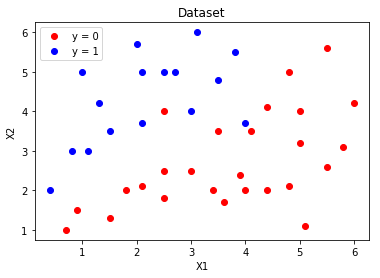

In [3]:
# Example Dataset
"""
An example dataset we will use to test the Logistic Regression models formulated above.
"""
# Importing the libraries
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the dataset
X_train = np.array([[0.4,2.0],[0.7,1.0],[0.8,3.0],[0.9,1.5],[1.0,5.0],[1.1,3.0],[1.3,4.2],[1.5,1.3],[1.5,3.5],
                    [1.8,2.0],[2.0,5.7],[2.1,2.1],[2.1,5.0],[2.1,3.7],[2.5,1.8],[2.5,2.5],[2.5,5.0],[2.5,4.0],
                    [2.7,5.0],[3.0,2.5],[3.0,4.0],[3.1,6.0],[3.4,2.0],[3.5,3.5],[3.5,4.8],[3.6,1.7],[3.8,5.5],
                    [3.9,2.4],[4.0,2.0],[4.0,3.7],[4.1,3.5],[4.4,2.0],[4.4,4.1],[4.8,2.1],[4.8,5.0],[5.0,3.2],
                    [5.0,4.0],[5.1,1.1],[5.5,2.6],[5.5,5.6],[5.8,3.1],[6.0,4.2]])
y_train = np.array([1,0,1,0,1,1,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
X_test = np.array([[2.3,3.7],[4.0,6.0],[1.0,3.5],[2.1,1.7],[3.0,2.1],[5.0,4.2]])
y_test = np.array([1,1,1,0,0,0])

# Printing dataset shape
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Plotting the dataset
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')

plt.title('Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Parameters and cost after iteration 0: 
W: [[-0.00730952 -0.00020238]], b: -0.00119047619048, cost: [[ 0.69314718]]

Parameters and cost after iteration 100: 
W: [[-0.36267467  0.22340157]], b: -0.0370644933273, cost: [[ 0.49571897]]

Parameters and cost after iteration 200: 
W: [[-0.56586646  0.40844248]], b: -0.0611650684985, cost: [[ 0.41838162]]

Parameters and cost after iteration 300: 
W: [[-0.71376335  0.54162405]], b: -0.0870352397996, cost: [[ 0.37765372]]

Parameters and cost after iteration 400: 
W: [[-0.82735397  0.64403618]], b: -0.113698651895, cost: [[ 0.35335388]]

Parameters and cost after iteration 500: 
W: [[-0.91783331  0.72631801]], b: -0.140699863592, cost: [[ 0.33756709]]

Parameters and cost after iteration 600: 
W: [[-0.99176028  0.7944362 ]], b: -0.167801146291, cost: [[ 0.32667028]]

Parameters and cost after iteration 700: 
W: [[-1.05328158  0.85205486]], b: -0.194863651872, cost: [[ 0.31879837]]

Parameters and cost after iteration 800: 
W: [[-1.10518258  0


Parameters and cost after iteration 9400: 
W: [[-1.42859391  1.50880022]], b: -1.5622742818, cost: [[ 0.27066086]]

Parameters and cost after iteration 9500: 
W: [[-1.42828921  1.51045962]], b: -1.56980270912, cost: [[ 0.27060132]]

Parameters and cost after iteration 9600: 
W: [[-1.42799091  1.51209588]], b: -1.57722044825, cost: [[ 0.27054352]]

Parameters and cost after iteration 9700: 
W: [[-1.4276989   1.51370938]], b: -1.58452925111, cost: [[ 0.2704874]]

Parameters and cost after iteration 9800: 
W: [[-1.42741306  1.51530047]], b: -1.59173083915, cost: [[ 0.27043291]]

Parameters and cost after iteration 9900: 
W: [[-1.42713326  1.51686948]], b: -1.59882690397, cost: [[ 0.27038]]

Prediction on test set:  [1 1 1 0 0 0]
Training Accuracy:  0.952380952381
Test Accuracy:  1.0

Time elapsed: 0.435207s


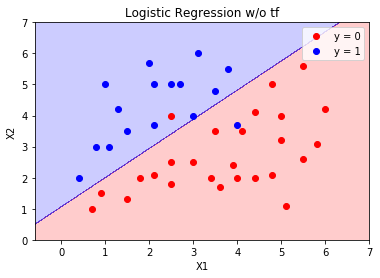

In [4]:
# Applying "Logistic Regression Model without TensorFlow"
"""
Here we test the "Logistic Regression Model without TensorFlow" function and we plot the predicted boundary. 
"""

time_start = time.clock()

# Running the function
W, b = Logistic_Regression_Model(X_train, y_train, X_test, y_test, num_iterations = 10000, 
                                 learning_rate = 0.01, reg_param = 1, print_cost = True)

time_elapsed = (time.clock() - time_start)
print('\nTime elapsed: %fs'%time_elapsed)

# Plotting the logistic regression boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
Z_grid = np.matmul(np.c_[X_grid_1.ravel(), X_grid_2.ravel()], np.transpose(W)) + b
y_grid = (1.0 / (1 + np.exp(-Z_grid))) > 0.5
plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'blue')))

plt.title('Logistic Regression w/o tf')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


Parameters and cost after iteration 0: 
W: [[-0.00730952 -0.00020238]], b: -0.00119048, cost: [[ 0.68775123]]

Parameters and cost after iteration 100: 
W: [[-0.36267465  0.22340158]], b: -0.0370645, cost: [[ 0.49462742]]

Parameters and cost after iteration 200: 
W: [[-0.56586647  0.4084425 ]], b: -0.0611651, cost: [[ 0.41784486]]

Parameters and cost after iteration 300: 
W: [[-0.71376354  0.54162413]], b: -0.0870352, cost: [[ 0.37734845]]

Parameters and cost after iteration 400: 
W: [[-0.82735401  0.64403629]], b: -0.113699, cost: [[ 0.35316217]]

Parameters and cost after iteration 500: 
W: [[-0.91783333  0.72631806]], b: -0.1407, cost: [[ 0.33743799]]

Parameters and cost after iteration 600: 
W: [[-0.99176049  0.79443622]], b: -0.167801, cost: [[ 0.32657883]]

Parameters and cost after iteration 700: 
W: [[-1.05328166  0.85205489]], b: -0.194864, cost: [[ 0.31873089]]

Parameters and cost after iteration 800: 
W: [[-1.10518229  0.90158492]], b: -0.2218, cost: [[ 0.31285217]]

Pa

Parameters and cost after iteration 7900: 
W: [[-1.43401051  1.48085737]], b: -1.43477, cost: [[ 0.27180275]]

Parameters and cost after iteration 8000: 
W: [[-1.43359768  1.48291504]], b: -1.44419, cost: [[ 0.27170959]]

Parameters and cost after iteration 8100: 
W: [[-1.43319237  1.48494291]], b: -1.45347, cost: [[ 0.2716192]]

Parameters and cost after iteration 8200: 
W: [[-1.43279636  1.48694122]], b: -1.46261, cost: [[ 0.27153146]]

Parameters and cost after iteration 8300: 
W: [[-1.43240547  1.48890948]], b: -1.47162, cost: [[ 0.27144635]]

Parameters and cost after iteration 8400: 
W: [[-1.432024    1.49085116]], b: -1.48049, cost: [[ 0.27136371]]

Parameters and cost after iteration 8500: 
W: [[-1.43165016  1.49276388]], b: -1.48923, cost: [[ 0.2712836]]

Parameters and cost after iteration 8600: 
W: [[-1.43128061  1.49464905]], b: -1.49784, cost: [[ 0.27120581]]

Parameters and cost after iteration 8700: 
W: [[-1.43092287  1.496508  ]], b: -1.50632, cost: [[ 0.27113026]]

Par

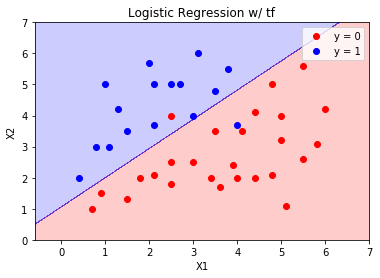

In [5]:
# Applying "Logistic Regression Model with Tensorflow"
"""
Here we test the "Logistic Regression Model with TensorFlow" function and we plot the predicted boundary. 
"""

time_start = time.clock()

# Running the function
W, b = Logistic_Regression_Model_tf(X_train, y_train, X_test, y_test, num_iterations = 10000, 
                                 learning_rate = 0.01, reg_param = 1, print_cost = True)

time_elapsed = (time.clock() - time_start)
print('\nTime elapsed: %fs'%time_elapsed)

# Plotting the logistic regression boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
Z_grid = np.matmul(np.c_[X_grid_1.ravel(), X_grid_2.ravel()], np.transpose(W)) + b
y_grid = (1.0 / (1 + np.exp(-Z_grid))) > 0.5

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Logistic Regression w/ tf')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


W: [[-1.48129833  1.36720552]], b: [-0.83140899]

Prediction on test set:  [1 1 1 0 0 0]
Training Accuracy:  0.952380952381
Test Accuracy:  1.0

Time elapsed: 0.355187s


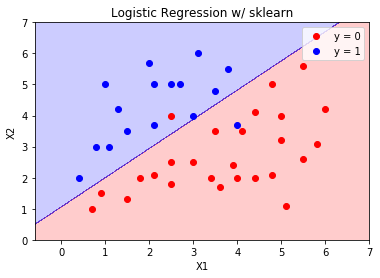

In [6]:
# Applying the Logistic Regression model using the scikit-learn library.
"""
Alternatively, we could have also used the LogisticRegression function within the scikit-learn library 
to perform logistic regression. 
"""
time_start = time.clock()

# Importing the libraries
from sklearn.linear_model import LogisticRegression

# Creating and fitting the logistic regression model to the dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train.ravel())

# Predicting the the test set results
y_pred = classifier.predict(X_test)

print('W: %s, b: %s\n'%(classifier.coef_, classifier.intercept_))
print('Prediction on test set: ', y_pred)

# Training accuracy
print('Training Accuracy: ', classifier.score(X_train, y_train))

# Test accuracy
print('Test Accuracy: ', classifier.score(X_test, y_test))

time_elapsed = (time.clock() - time_start)
print('\nTime elapsed: %fs'%time_elapsed)

# Plotting the logistic regression boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
Z_grid = np.matmul(np.c_[X_grid_1.ravel(), X_grid_2.ravel()], np.transpose(W)) + b
y_grid = (1.0 / (1 + np.exp(-Z_grid))) > 0.5

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Logistic Regression w/ sklearn')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()